In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam(2).csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3156,ham,Havent shopping now lor i juz arrive only,NaN,NaN,NaN
3754,ham,"\Im on gloucesterroad what are uup to later?\""""",NaN,NaN,NaN
4564,ham,Honeybee Said: *I'm d Sweetest in d World* God...,NaN,NaN,NaN
3473,ham,", how's things? Just a quick question.",NaN,NaN,NaN
2804,ham,I think it's all still in my car,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [7]:
df.sample(5)

,v1,v2
2134,ham,If he started searching he will get job in few...
3895,spam,tells u 2 call 09066358152 to claim å£5000 pri...
2185,ham,Purity of friendship between two is not about ...
4430,ham,2mro i am not coming to gym machan. Goodnight.
2232,ham,Nothing just getting msgs by dis name wit diff...


In [8]:
#rename columns 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4794,ham,Saw Guys and Dolls last night with Patrick Swa...
4156,ham,This single single answers are we fighting? Pl...
1321,ham,"I wake up long ago already... Dunno, what othe..."
5469,ham,Ok lor.
5299,ham,Well good morning mr . Hows london treatin' ya...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# cheack for dublicates values
df.duplicated().sum()

403

In [14]:
#drop dupicates
df=df.drop_duplicates(keep='first')

In [15]:
df.shape

(5169, 2)

# 2.EDA

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

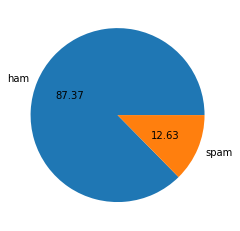

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [31]:
#Data is imbalanced 
!pip install nltk

In [32]:
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [21]:
df["num_characters"]=df["text"].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [24]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\vibha/nltk_data'
    - 'C:\\Users\\vibha\\anaconda4\\nltk_data'
    - 'C:\\Users\\vibha\\anaconda4\\share\\nltk_data'
    - 'C:\\Users\\vibha\\anaconda4\\lib\\nltk_data'
    - 'C:\\Users\\vibha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
